### XENONnT posterior analysis

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

XENONnT = np.load("chains/mcmc3_chain_100000.npz")
chain1 = XENONnT["chain"]         # shape = (nsteps, nwalkers, ndim)
log_prob1 = XENONnT["log_prob"]   # shape = (nsteps, nwalkers)
nsteps1, nwalkers1, ndim1 = chain1.shape

print(np.shape(chain1))
print(np.shape(log_prob1))

try:
    tau = emcee.autocorr.integrated_time(chain1, tol=0)
    print("Autocorrelation time τ for each parameter:\n", tau)
    
    burnin = int(2 * np.max(tau))  # it's often burn-in 2*tau
    thinning = int(0.5 * np.min(tau))  
    print(f"Suggested burn-in: {burnin}, thinning interval: {thinning}")
    
except emcee.autocorr.AutocorrError:
    print("Autocorrelation time could not be reliably estimated. Run longer.")
    burnin = 0
    thinning = 1

(100000, 15, 5)
(100000, 15)
Autocorrelation time τ for each parameter:
 [221.71445733 256.21017793 400.29742519 283.99143524 263.43504041]
Suggested burn-in: 800, thinning interval: 110


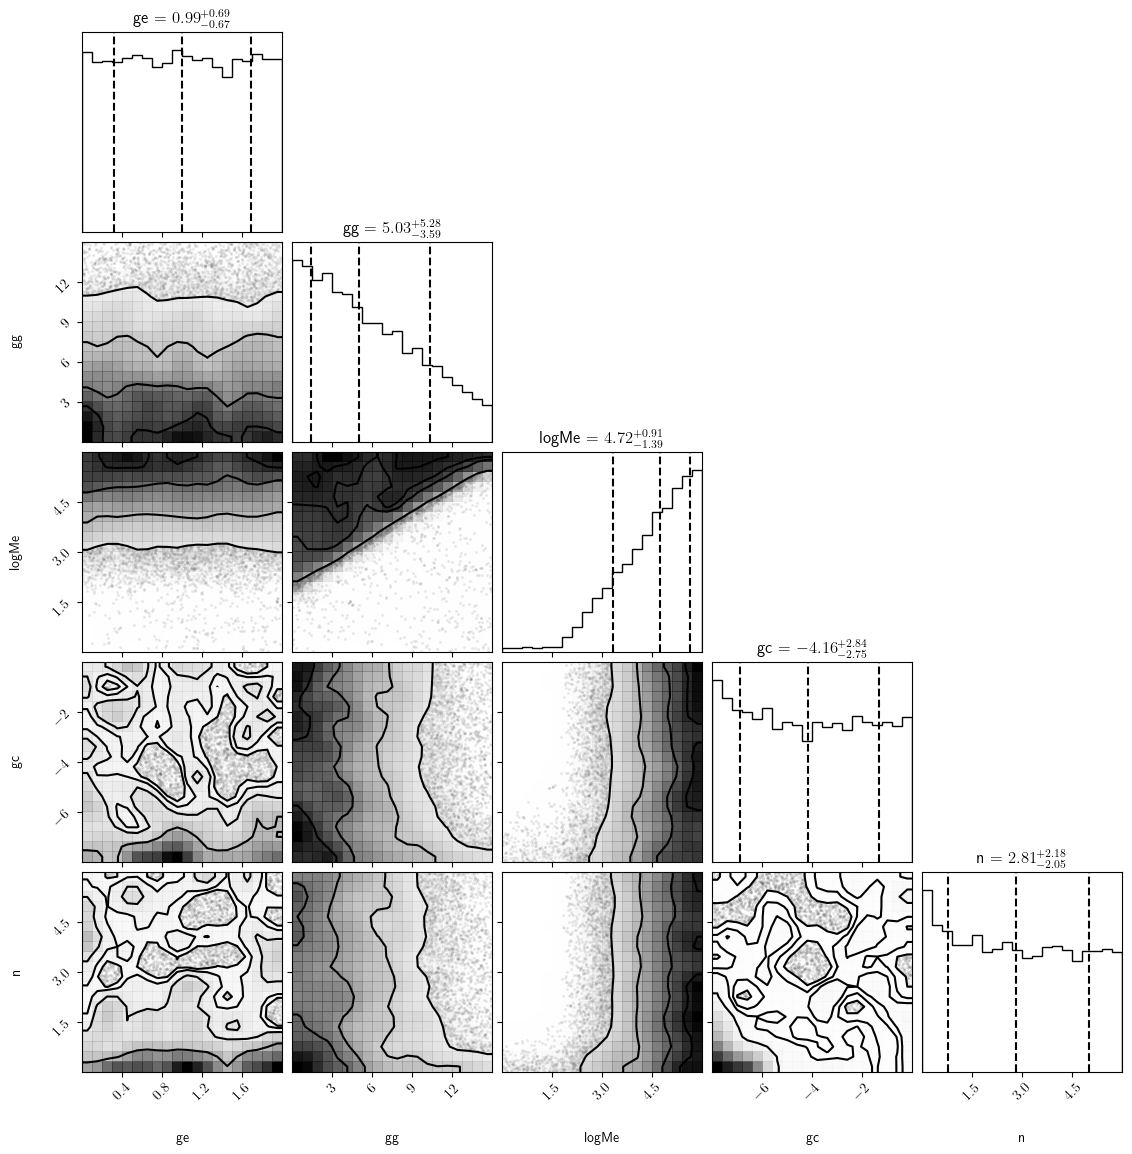

In [104]:
param_labels = ['ge', 'gg', 'logMe', 'gc', 'n']
samples1 = chain1[burnin::thinning, :, :].reshape(-1, ndim)
log_probs1 = log_prob1[burnin::thinning, :].reshape(-1)

import corner

figure = corner.corner(samples1, labels=param_labels,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, smooth=True, title_kwargs={"fontsize": 12})
plt.show()

P/Pmax occurs near: -8.2365
Corresponding gg = 0.4077, logMe = 2.1610


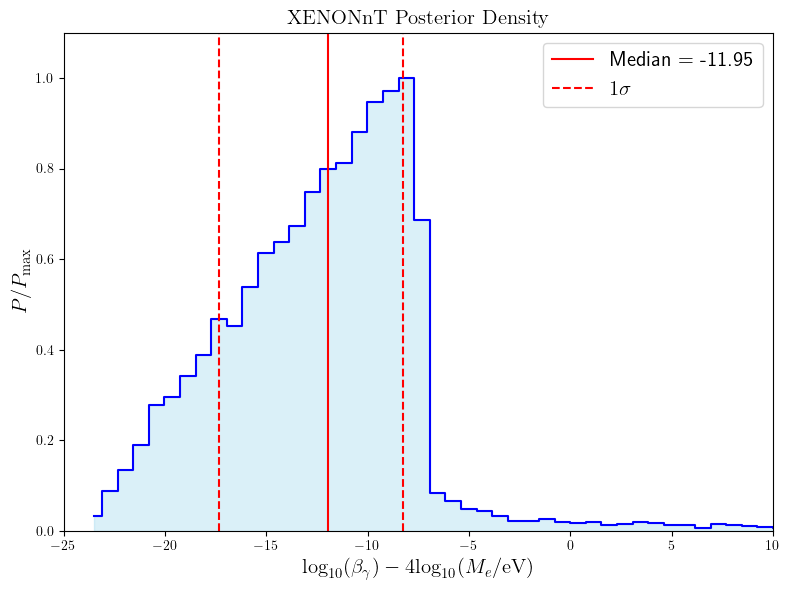

In [105]:
# Compute derived parameter
gg = samples1[:, param_labels.index("gg")]
logMe = samples1[:, param_labels.index("logMe")]
derived = gg - 4 * logMe

# Manually compute histogram
counts, bin_edges = np.histogram(derived, bins=50, density=False)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
normalized_counts = counts / np.max(counts)

max_bin_idx = np.argmax(counts)   # Find the bin with max P
bin_lo, bin_hi = bin_edges[max_bin_idx], bin_edges[max_bin_idx+1]
in_bin = (derived >= bin_lo) & (derived < bin_hi)   # Find samples in that bin

# Choose one of the samples (e.g. the first)
gg_peak = gg[in_bin][0]
logMe_peak = logMe[in_bin][0]
derived_peak = derived[in_bin][0]
print(f"P/Pmax occurs near: {derived_peak:.4f}")
print(f"Corresponding gg = {gg_peak:.4f}, logMe = {logMe_peak:.4f}")

plt.figure(figsize=(8,6))
# plt.hist(derived, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='k')
plt.plot(bin_centers, normalized_counts, drawstyle='steps-mid', color='blue')
plt.fill_between(bin_centers, normalized_counts, step='mid', alpha=0.3, color='skyblue')

q16, q50, q84 = np.percentile(derived, [16, 50, 84])
plt.axvline(q50, color='r', linestyle='-', label=f"Median = {q50:.2f}")
plt.axvline(q16, color='r', linestyle='--', label=r"$1\sigma$")
plt.axvline(q84, color='r', linestyle='--')

plt.xlim(-25, 10)
plt.ylim(0.0, 1.1)
plt.xlabel(r"$ {\rm log}_{10}(\beta_{\gamma}) - 4{\rm log}_{10} ({M_e/ {\rm eV}})$", fontsize=15)
plt.ylabel(r"$P / P_{\max}$", fontsize=15)
plt.title(r"${\rm XENONnT~Posterior~Density}$", fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

### 95% parameters limits

95% upper limit on ge: 1.9135


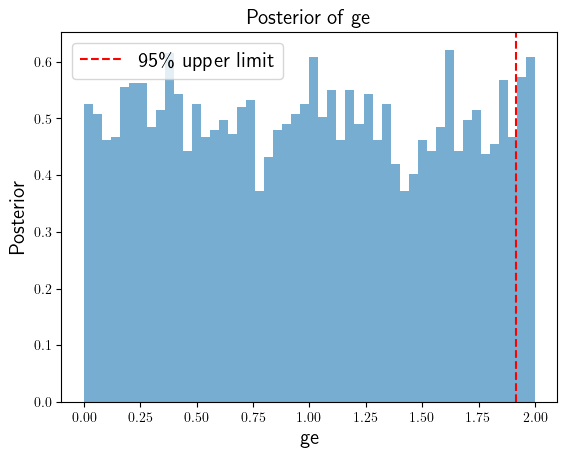

95% upper limit on gg: 13.3036


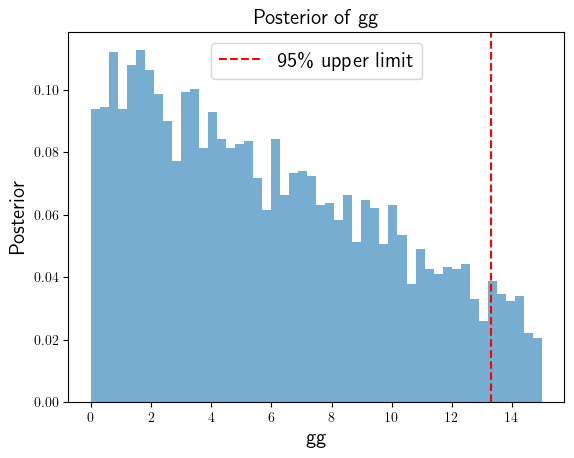

95% upper limit on logMe: 5.8395


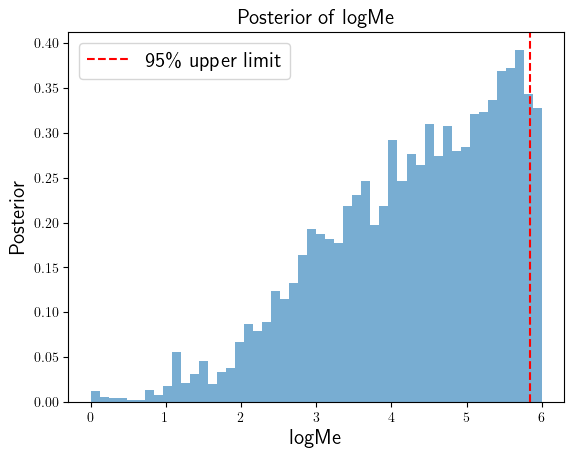

95% upper limit on gc: -0.4922


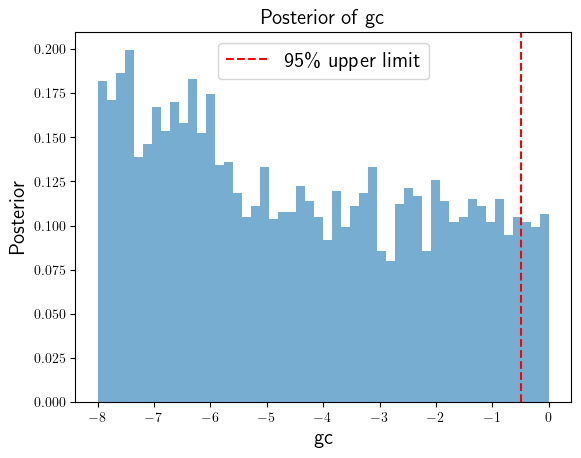

95% upper limit on n: 5.6402


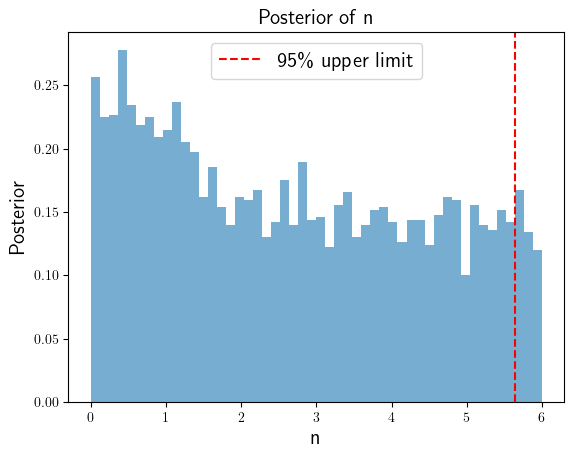

In [97]:
for i, label in enumerate(param_labels):
    param_vals = samples[:, i]
    upper = np.percentile(param_vals, 95)
    print(f"95% upper limit on {label}: {upper:.4f}")
    
    plt.hist(param_vals, bins=50, density=True, alpha=0.6)
    plt.axvline(upper, color='r', linestyle='--', label="95\% upper limit")
    plt.xlabel(label, fontsize=15)
    plt.ylabel("Posterior", fontsize=15)
    plt.legend(fontsize=15)
    plt.title(f"Posterior of {label}", fontsize=15)
    plt.show()


### XENON1T posterior analysis

(50000, 15, 5)
(50000, 15)


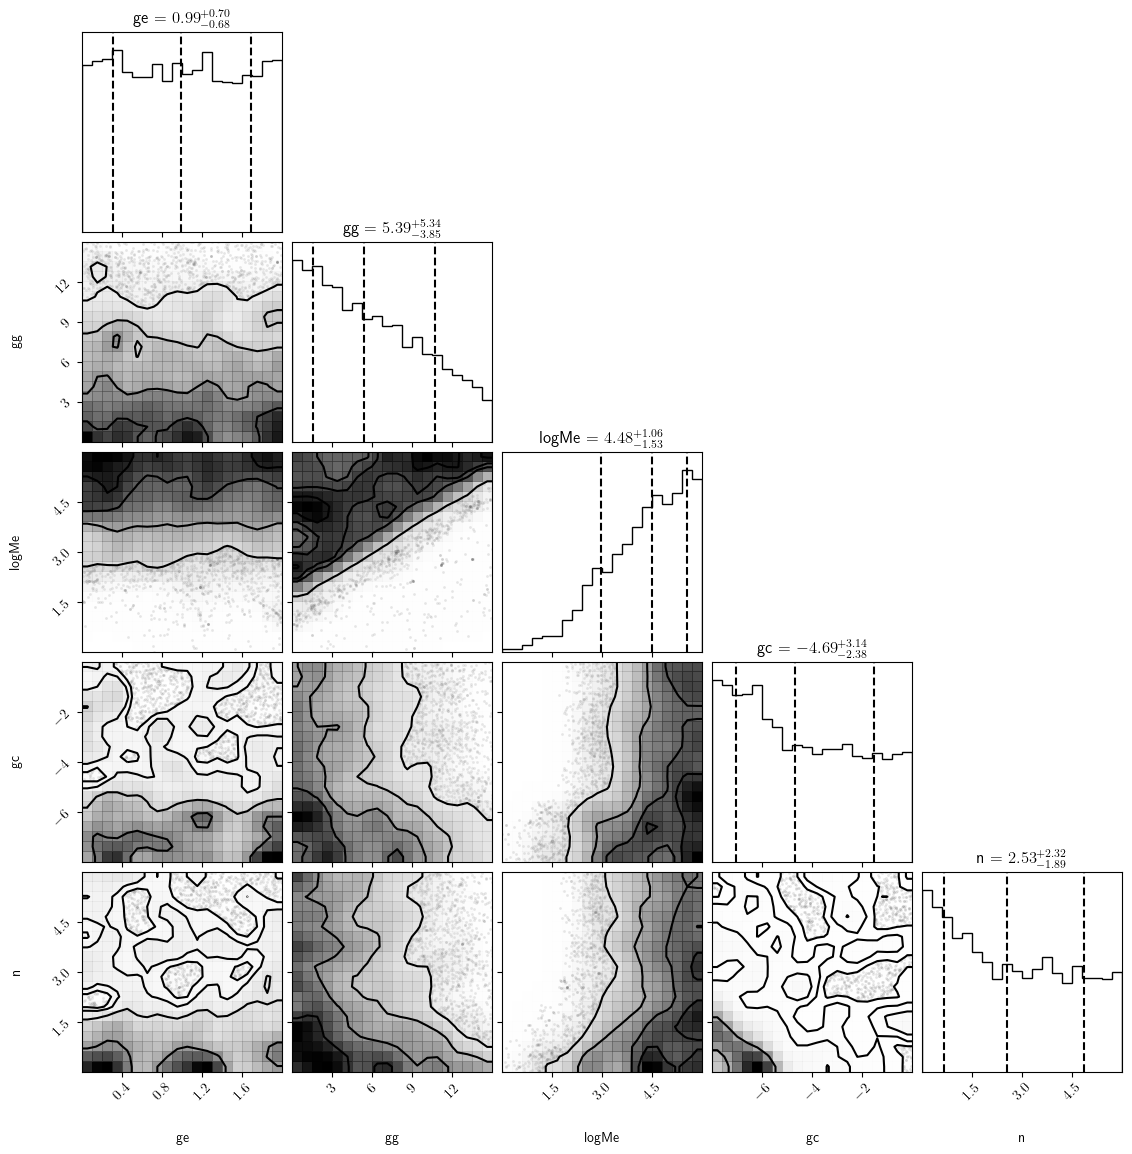

In [98]:
data = np.load("chains/XENON1T_chain_50000.npz")
chain = data["chain"]         # shape = (nsteps, nwalkers, ndim)
log_prob = data["log_prob"]   # shape = (nsteps, nwalkers)
nsteps, nwalkers, ndim = chain.shape

print(np.shape(chain))
print(np.shape(log_prob))

param_labels = ['ge', 'gg', 'logMe', 'gc', 'n']
samples = chain[burnin::thinning, :, :].reshape(-1, ndim)
log_probs = log_prob[burnin::thinning, :].reshape(-1)

import corner

figure = corner.corner(samples, labels=param_labels,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, smooth=True, title_kwargs={"fontsize": 12})
plt.show()

P/Pmax occurs near: -7.6487
Corresponding gg = 10.3774, logMe = 4.5065


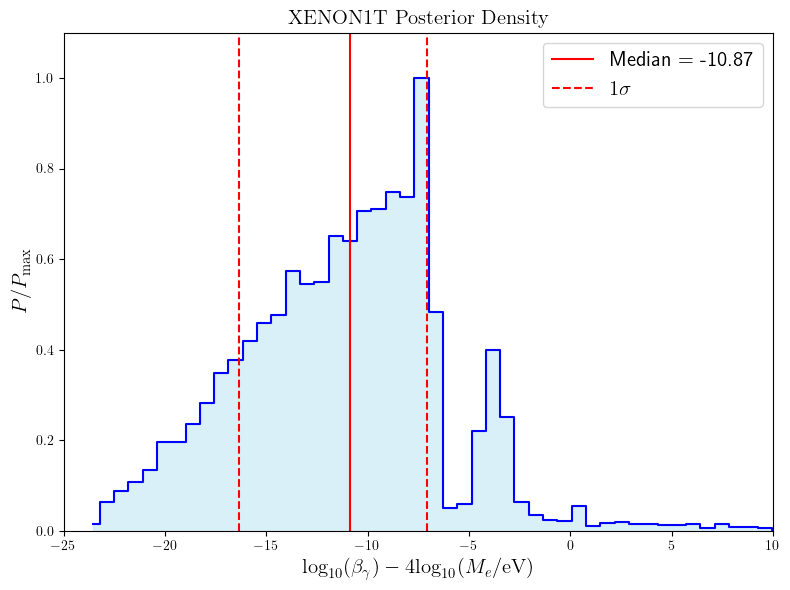

In [99]:
# Compute derived parameter
gg = samples[:, param_labels.index("gg")]
logMe = samples[:, param_labels.index("logMe")]
derived = gg - 4 * logMe

# Manually compute histogram
counts, bin_edges = np.histogram(derived, bins=50, density=False)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
normalized_counts = counts / np.max(counts)

max_bin_idx = np.argmax(counts)   # Find the bin with max P
bin_lo, bin_hi = bin_edges[max_bin_idx], bin_edges[max_bin_idx+1]
in_bin = (derived >= bin_lo) & (derived < bin_hi)   # Find samples in that bin

# Choose one of the samples (e.g. the first)
gg_peak = gg[in_bin][0]
logMe_peak = logMe[in_bin][0]
derived_peak = derived[in_bin][0]
print(f"P/Pmax occurs near: {derived_peak:.4f}")
print(f"Corresponding gg = {gg_peak:.4f}, logMe = {logMe_peak:.4f}")

plt.figure(figsize=(8,6))
# plt.hist(derived, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='k')
plt.plot(bin_centers, normalized_counts, drawstyle='steps-mid', color='blue')
plt.fill_between(bin_centers, normalized_counts, step='mid', alpha=0.3, color='skyblue')

q16, q50, q84 = np.percentile(derived, [16, 50, 84])
plt.axvline(q50, color='r', linestyle='-', label=f"Median = {q50:.2f}")
plt.axvline(q16, color='r', linestyle='--', label=r"$1\sigma$")
plt.axvline(q84, color='r', linestyle='--')

plt.xlim(-25, 10)
plt.ylim(0.0, 1.1)
plt.xlabel(r"$ {\rm log}_{10}(\beta_{\gamma}) - 4{\rm log}_{10} ({M_e/ {\rm eV}})$", fontsize=15)
plt.ylabel(r"$P / P_{\max}$", fontsize=15)
plt.title(r"${\rm XENON1T~Posterior~Density}$", fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()